## Customer Churn Prediction for a Telecom Company

### Loading Data 

In [11]:
# import required libraries
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/Sha pa/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# View shape and first few rows
print(f"Shape of dataset: {df.shape}")

df.info()
df.describe()


Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 2: Data Cleaning & Preprocessing

In [13]:
df['TotalCharges'].value_counts().head()

# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became NaN
print(df['TotalCharges'].isna().sum())

# Drop rows with NaN in TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop customerID column (not useful for ML)
df.drop('customerID', axis=1, inplace=True)

df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

11


###  Step 3: Exploratory Data Analysis (EDA)

#### 🔹 1. Churn Distribution

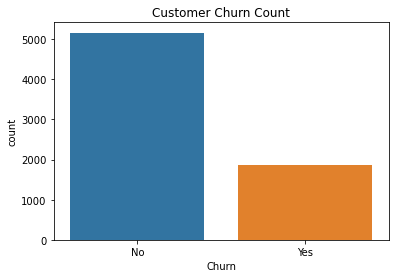

0    73.421502
1    26.578498
Name: Churn, dtype: float64


In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


#### 🔹 2. Numerical Features vs Churn

##### Tenure vs Churn

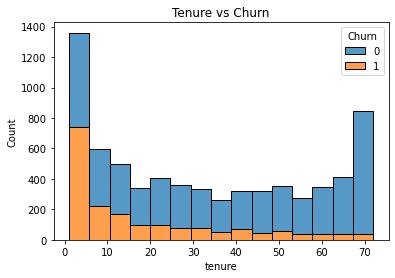

In [15]:
sns.histplot(data=df,x='tenure',hue='Churn',multiple='stack')
plt.title("Tenure vs Churn")
plt.show()

##### MonthlyCharges vs churn

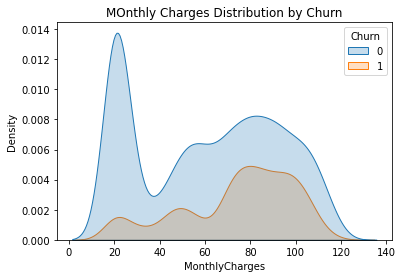

In [16]:
sns.kdeplot(data=df,x='MonthlyCharges',hue='Churn',fill=True)
plt.title("MOnthly Charges Distribution by Churn")
plt.show()

##### Total Charges vs Churn

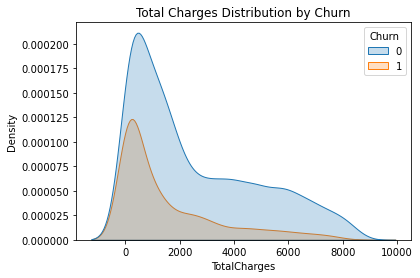

In [17]:
sns.kdeplot(data=df,x='TotalCharges',hue='Churn',fill=True)
plt.title("Total Charges Distribution by Churn")
plt.show()

#### 🔹 3. Categorical Features vs Churn

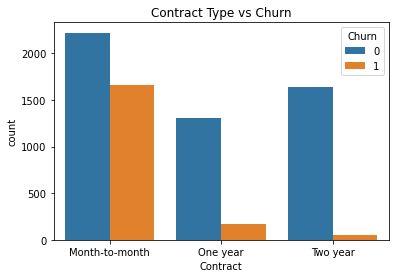

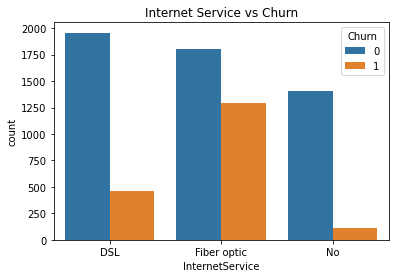

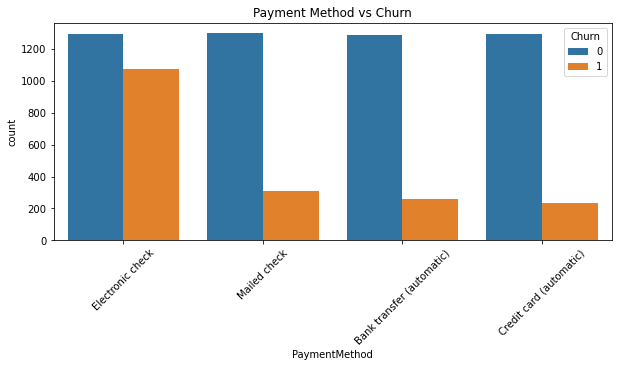

In [22]:
#contract type
sns.countplot(x='Contract',hue='Churn',data=df)
plt.title("Contract Type vs Churn")
plt.show()

#Internet Service
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.title("Internet Service vs Churn")
plt.show()

#Payment Method vs Churn
plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

## Step 4: Feature Encoding & Splitting the Data

In [25]:
df_encoded=pd.get_dummies(df,drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [26]:
# lets define X and Y
X=df_encoded.drop('Churn',axis=1)
y=df_encoded['Churn']

#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (5625, 30)
Testing data shape: (1407, 30)


## Step 5: Build Your First Model — Logistic Regression

In [28]:
#import and train the model
from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression(max_iter=1000)

model_lr.fit(X_train,y_train)

y_pred=model_lr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))
    

Accuracy: 0.7853589196872779
Confusion Matrix:
 [[917 116]
 [186 188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407



## Step 6: Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

y_pred_dt=dt_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Accuracy:",accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_dt))
print("Classification Report:\n", classification_report(y_test,y_pred_dt))

Accuracy: 0.7249466950959488
Confusion Matrix:
 [[825 208]
 [179 195]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



### Let's improve decision trees with hyperparameter tuning

### Step 7: Tune Decision Tree with Hyperparameters

In [33]:
from sklearn.tree import DecisionTreeClassifier

tuned_dt=DecisionTreeClassifier(
         max_depth=5,
         min_samples_split=20,
         min_samples_leaf=10,
         criterion='gini',
         random_state=42      
)

tuned_dt.fit(X_train,y_train)

y_pred_tuned=tuned_dt.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Accuracy:",accuracy_score(y_test,y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_tuned))
print("Classification Report:\n", classification_report(y_test,y_pred_tuned))

Accuracy: 0.7746979388770433
Confusion Matrix:
 [[868 165]
 [152 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.57      0.59      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.78      1407



### Step 8: Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model=GradientBoostingClassifier(
n_estimators=100,
learning_rate=0.1,
max_depth=3,
random_state=42
)

gb_model.fit(X_train,y_train)

y_pred_gb=gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.7896233120113717
Confusion Matrix:
 [[932 101]
 [195 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### Step 9: Adjust the Classification Threshold

In [46]:
y_probs = gb_model.predict_proba(X_test)[:,1]


import numpy as np

# Predict churn if probability > 0.4
y_pred_thresh = np.where(y_probs > 0.4, 1, 0)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

Accuracy: 0.775408670931059
Confusion Matrix:
 [[849 184]
 [132 242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1033
           1       0.57      0.65      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407



In [47]:
y_probs = gb_model.predict_proba(X_test)[:,1]


import numpy as np

# Predict churn if probability > 0.4
y_pred_thresh = np.where(y_probs > 0.45, 1, 0)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

Accuracy: 0.7896233120113717
Confusion Matrix:
 [[895 138]
 [158 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.61      0.58      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [48]:
y_probs = gb_model.predict_proba(X_test)[:,1]


import numpy as np

# Predict churn if probability > 0.4
y_pred_thresh = np.where(y_probs > 0.5, 1, 0)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

Accuracy: 0.7896233120113717
Confusion Matrix:
 [[932 101]
 [195 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

